In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Dataset .csv")  # Use your uploaded file
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
table_counts = df['Has Table booking'].value_counts(normalize=True) * 100
delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100

print("Table Booking %:\n", table_counts)
print("\nOnline Delivery %:\n", delivery_counts)


Table Booking %:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Online Delivery %:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


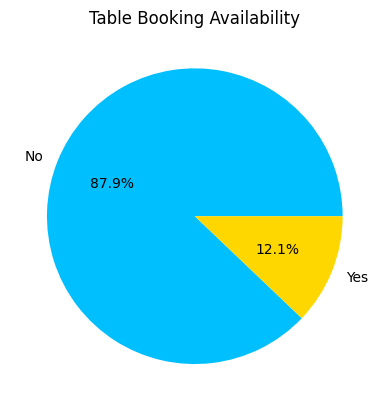

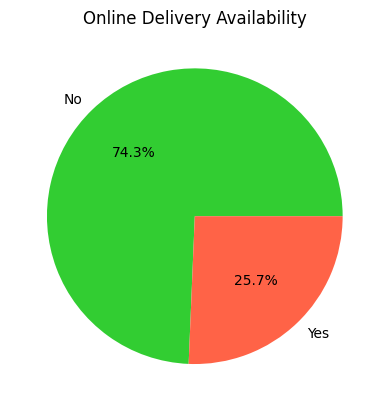

In [3]:
table_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#00BFFF','#FFD700'], title='Table Booking Availability')
plt.ylabel("")
plt.show()

delivery_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#32CD32','#FF6347'], title='Online Delivery Availability')
plt.ylabel("")
plt.show()


Average Ratings Based on Table Booking:
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


C:\Users\torah\AppData\Local\Temp\ipykernel_22896\1341694885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_booking.index, y=avg_rating_booking.values, palette='coolwarm')


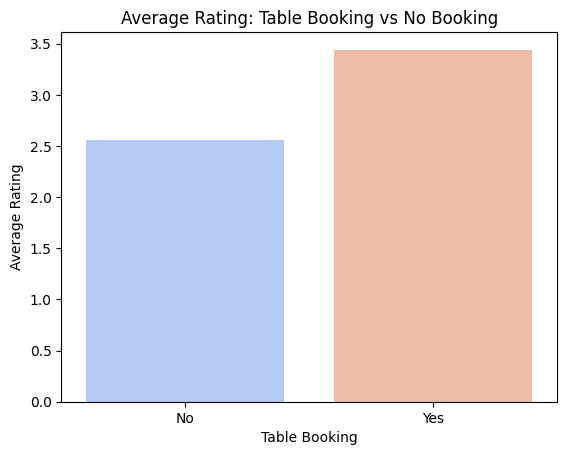

In [4]:
avg_rating_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("Average Ratings Based on Table Booking:\n", avg_rating_booking)

sns.barplot(x=avg_rating_booking.index, y=avg_rating_booking.values, palette='coolwarm')
plt.title("Average Rating: Table Booking vs No Booking")
plt.ylabel("Average Rating")
plt.xlabel("Table Booking")
plt.show()


Online Delivery by Price Range:
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


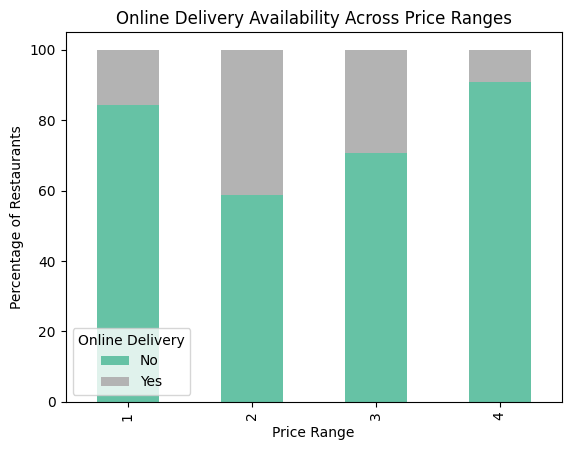

In [5]:
delivery_by_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
print("Online Delivery by Price Range:\n", delivery_by_price)

delivery_by_price.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Online Delivery Availability Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.legend(title="Online Delivery")
plt.show()
